In [77]:
import torch
from torch import nn
# torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [78]:
torch.__version__

'2.9.0+cpu'

In [79]:
torchvision.__version__

'0.24.0+cpu'

## 1. Geting dataset

In [80]:
train_data = datasets.FashionMNIST(
    root="data", # where to store the data
    train=True, # do we want the training set?
    download=True, # download if not already downloaded
    transform=torchvision.transforms.ToTensor(),
    target_transform=None # how do we want transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [81]:
len(train_data), len(test_data)

(60000, 10000)

In [82]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [83]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [84]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### input and output shape

In [85]:
print(f"image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {label}, class name: {class_names[label]}")

image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: 9, class name: Ankle boot


### visualizing our data

Image shape: torch.Size([1, 28, 28])


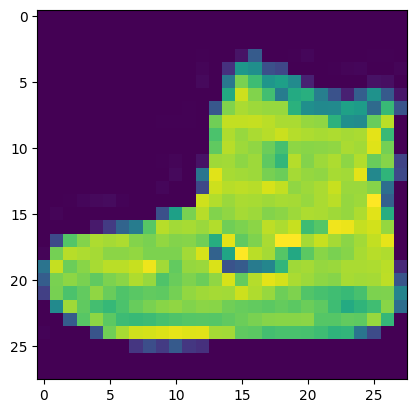

In [86]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())

(-0.5, 27.5, 27.5, -0.5)

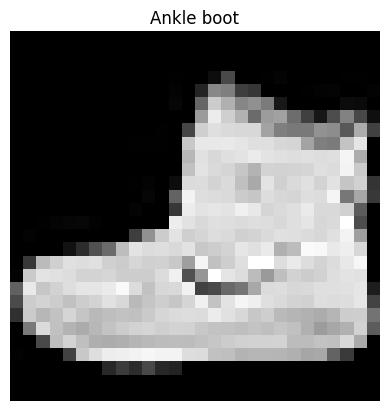

In [87]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

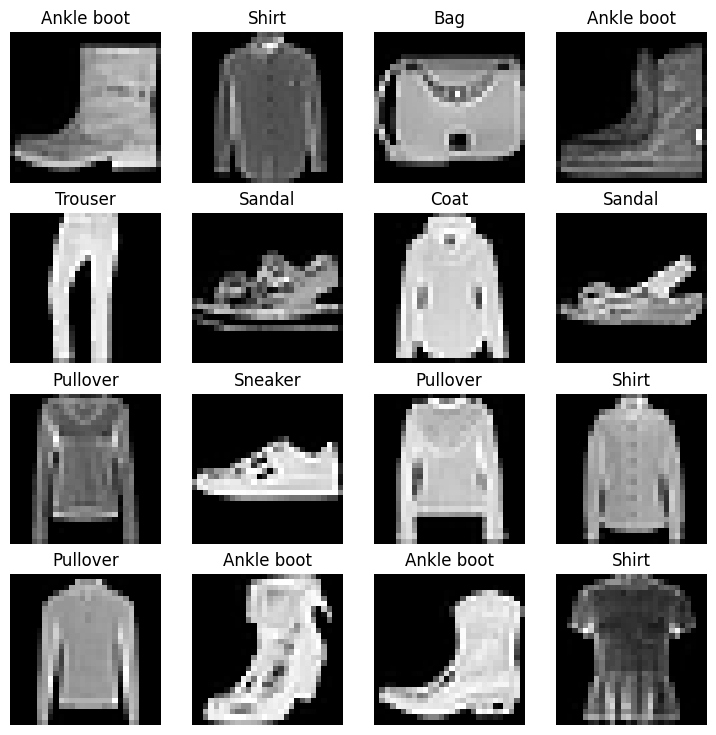

In [88]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 2. Prepare Dataloader

Teraz dane są w formie PyTorchowego datasetu.

DataLoader zamienia dataset w Python iterable - elementy po których można iterować, czyli zamienić na batche.

Po co to robić?

* jest to bardziej wydajne - małe porcje na raz
* dzięki temu sieci neuronowe mają więcej szans by aktualizować gradienty na każdej epoce.

In [89]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

#turning it into iterable
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1b504e68e00>,
 <torch.utils.data.dataloader.DataLoader at 0x1b57e2cc5c0>)

In [90]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)}  batches of {BATCH_SIZE} samples")
print(f"Length of test dataloader: {len(test_dataloader)}  batches of {BATCH_SIZE} samples")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001B504E68E00>, <torch.utils.data.dataloader.DataLoader object at 0x000001B57E2CC5C0>)
Length of train dataloader: 1875  batches of 32 samples
Length of test dataloader: 313  batches of 32 samples


In [91]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


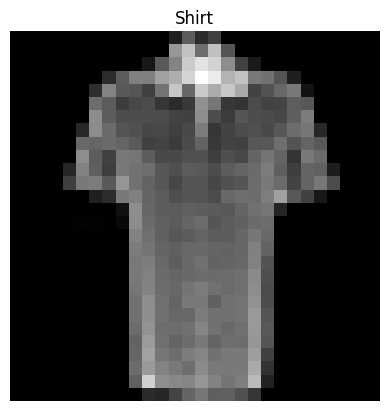

In [92]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Building first model - basline

In [93]:
# new layer - flaten one
flatten_layer = nn.Flatten() # spłaszczenie wktoru wielowymiarowego 

# Get a single sample
x = train_features_batch[0]

# flatten the sample
output = flatten_layer(x) # perform forward pass
print(x.shape) # -> [color_channels, height, width]
print(output.shape) # -> [color_channels, height * width]

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [94]:
class FashionMNISTModelV0(nn.Module):
    def __init__ (self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

In [95]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
)

model_0

FashionMNISTModelV0(
  (linear_layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [96]:
dummy_x = torch.randn([1, 1, 28, 28]) # batch size of 1, single sample of the same shape as FashionMNIST
model_0(dummy_x) # do tego było potrzebne flatten, aby na każdą klasę był jeden logit
# Powyższy kod tylko przedstawia symulacje działania modelu na przykładowych danych wejściowych

tensor([[-0.2228,  0.1477,  0.3137, -0.3110, -0.3713,  0.0156,  0.4363,  0.1060,
         -0.1604, -0.4388]], grad_fn=<AddmmBackward0>)

loss, optimizer and evaluation metrics

In [97]:
import requests
from pathlib import Path

# Download helper functions from GitHub
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download.")
else:
    requests = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(requests.content)

helper_functions.py already exists, skipping download.


In [98]:
# Import acc from helper functions file
from helper_functions import accuracy_fn


In [99]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


function to time fucntion

In [100]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device=None):
    """Prints the training time.

    Args:
        start (float): Time when training started.
        end (float): Time when training ended.
        device (torch.device, optional): Device used for training. Defaults to None.
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

TRAINING LOOP ON BATCH DATA
* iterowanie po epokach
* iterowanie po batchach treningowych, trening, liczenie strat i dokładności
* iterowanie po batchach testowych -||-
* print whats going on

In [101]:
# pip install tqdm

In [102]:
from tqdm.auto import tqdm

In [103]:
strat =  timer()
EPOCHS = 3

for epochs in tqdm(range(EPOCHS)):
    print(f"Epoch: {epochs}\n-------")
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() # acumulate the loss values

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # print whats heppening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    # devide total train loss by length of train dataloader to get the average loss per batch
    train_loss /= len(train_dataloader)

    ### testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate loss
            test_loss += loss_fn(test_pred, y_test)

            # 3. Calculate acc
            test_acc += accuracy_fn(y_true=y_test,
                                    y_pred=test_pred.argmax(dim=1))
            
        # calculate the average test loss and acc per batch
        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}%\n")

end = timer()
total_time = print_train_time(start=strat, end=end, device="cpu")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 33%|███▎      | 1/3 [00:03<00:07,  3.75s/it]


Train loss: 0.58776 | Test loss: 0.6322 | Test acc: 77.0467%

Epoch: 1
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 67%|██████▋   | 2/3 [00:07<00:03,  3.84s/it]


Train loss: 0.47601 | Test loss: 0.5046 | Test acc: 82.0587%

Epoch: 2
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 3/3 [00:11<00:00,  3.92s/it]


Train loss: 0.45247 | Test loss: 0.5013 | Test acc: 81.9788%

Train time on cpu: 11.776 seconds


## 4. Make predictions and gets results

In [104]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device):
    """Returns a dictionary of model results on a given data loader."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            # 1. Forward pass
            y_pred = model(X)

            # 2. Calculate loss
            loss += loss_fn(y_pred, y)

            # 3. Calculate acc
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        # scale loss and acc to find average loss and acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name" : model.__class__.__name__, # only works when model was created with class
            "model_loss" : loss.item(),
            "model_acc" : acc}

In [105]:
model_0_results = eval_model(model=model_0,
                             data_loader = test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device="cpu")
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5012819766998291,
 'model_acc': 81.97883386581469}

## 5. Setup device agnostic-code (for using GPU if there is one)

In [106]:
torch.cuda.is_available()

False

In [107]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Creating model with non-linearity

In [108]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

In [109]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(
    input_shape=28*28, # output of flatten layer
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

next(model_1.parameters()).device

device(type='cpu')

In [110]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [111]:
# creating function for training loop
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    
    """Performs a training step over a single epoch."""
    # put model in train mode
    model.train()

    train_loss, train_acc = 0, 0
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(data_loader):
        # Put data on the target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss and accuracy per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() # acumulate the loss values
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # logits -> prediction labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # devide total train loss by length of train dataloader to get the average loss per batch
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")


In [112]:
# creating function for testing loop

def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Performs a testing step over a single epoch."""
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            # to device
            X_test, y_test = X_test.to(device), y_test.to(device)

            # 1. Forward pass
            test_pred = model(X_test)

            # 2. Calculate loss
            test_loss += loss_fn(test_pred, y_test)

            # 3. Calculate acc
            test_acc += accuracy_fn(y_true=y_test,
                                    y_pred=test_pred.argmax(dim=1))
            
        # calculate the average test loss and acc per batch
        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)

        print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}%\n")


In [113]:
torch.manual_seed(42)

epochs = 3

# create a optimization and evaluation loop using created functions

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch+1}\n-------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1
-------
Train loss: 0.64607 | Train acc: 77.17%


 33%|███▎      | 1/3 [00:04<00:08,  4.28s/it]


Train loss: 0.45247 | Test loss: 0.5386 | Test acc: 80.7608%

Epoch: 2
-------
Train loss: 0.48094 | Train acc: 82.94%


 67%|██████▋   | 2/3 [00:08<00:04,  4.24s/it]


Train loss: 0.45247 | Test loss: 0.4939 | Test acc: 82.4581%

Epoch: 3
-------
Train loss: 0.44689 | Train acc: 84.16%


100%|██████████| 3/3 [00:12<00:00,  4.23s/it]


Train loss: 0.45247 | Test loss: 0.4575 | Test acc: 83.9856%



Get model results dictionary

In [114]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

In [115]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.45746350288391113,
 'model_acc': 83.98562300319489}

# Building a Convolution Neural Network

In [116]:
class FashionMNISTModelV2(nn.Module):
    """Replicates TinyVGG architecture."""
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=1,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1), # values that we can set ourselfs
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # i should calculate this
                      out_features=output_shape)
        )
    
    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

            



In [117]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)

In [118]:
rand_image_tensor = torch.randn(size=(1, 28, 28)).unsqueeze(0) # add batch dimension
rand_image_tensor.shape

torch.Size([1, 1, 28, 28])

In [119]:
# pass through model
model_2(rand_image_tensor)

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

### Steping through conv2d

In [120]:
torch.manual_seed(42)

# create batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(images.shape)
print(test_image.shape)
print(test_image)

torch.Size([32, 3, 64, 64])
torch.Size([3, 64, 64])
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.

In [121]:
# Create a conv layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3, # to ksztrałt 3 to tak samo jak (3, 3)
                       stride=1, # o ile pikseli przeskakujemy
                       padding=0) # ile pikseli dodajemy dookoła obrazu, wtedy mozna skupić się na krawędziach

# pass the data through the conv layer
conv_output = conv_layer(test_image.unsqueeze(0)) # dodajemy batch dimension
conv_output


tensor([[[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
            6.6224e-01, -2.3216e-01],
          [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
           -1.8552e-01, -5.7622e-01],
          [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
            1.4923e-01,  1.4236e-01],
          ...,
          [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
            4.2594e-01, -4.8341e-01],
          [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
           -3.6626e-01,  3.5645e-01],
          [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
           -4.9680e-01, -7.2258e-01]],

         [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
           -1.7643e+00,  2.5263e-01],
          [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
            4.8068e-01,  8.4869e-01],
          [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
            2.4611e-01,  6.6233e-01],
          ...,
     

### Steping through maxpool2d

In [122]:
# print out orginal shape of image without unsqueezed dimension
print(test_image.shape)

# create a sample nn.maxpool2d layer
maxpool_layer = nn.MaxPool2d(kernel_size=2)

# pass data through just the conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(test_image_through_conv.shape)

# pass data through the maxpool layer
test_image_through_maxpool = maxpool_layer(test_image_through_conv)
print(test_image_through_maxpool.shape)

torch.Size([3, 64, 64])
torch.Size([1, 10, 62, 62])
torch.Size([1, 10, 31, 31])


In [123]:
torch.manual_seed(42)

random_tensor = torch.randn(size=(1, 1, 2, 2))
print(random_tensor)
print(random_tensor.shape)

maxpool = nn.MaxPool2d(kernel_size=2)

maxpool_tensor = maxpool(random_tensor)
print(maxpool_tensor)
print(maxpool_tensor.shape)

tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
torch.Size([1, 1, 2, 2])
tensor([[[[0.3367]]]])
torch.Size([1, 1, 1, 1])


### Setup a loss function and optimizer

In [124]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [125]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### Training and testing

In [126]:
torch.manual_seed(42)

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(model=model_2,
            data_loader=train_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)
    test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.59370 | Train acc: 78.38%


 33%|███▎      | 1/3 [00:10<00:21, 10.79s/it]


Train loss: 0.45247 | Test loss: 0.3905 | Test acc: 85.9824%

Epoch: 1
-------
Train loss: 0.35887 | Train acc: 86.97%


 67%|██████▋   | 2/3 [00:20<00:10, 10.42s/it]


Train loss: 0.45247 | Test loss: 0.3593 | Test acc: 86.6114%

Epoch: 2
-------
Train loss: 0.32267 | Train acc: 88.31%


100%|██████████| 3/3 [00:31<00:00, 10.51s/it]


Train loss: 0.45247 | Test loss: 0.3352 | Test acc: 88.1789%



In [127]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                                loss_fn=loss_fn,
                                accuracy_fn=accuracy_fn,
                                device=device)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33518344163894653,
 'model_acc': 88.17891373801918}

Compare models

In [128]:
## compare model results
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.501282,81.978834
1,FashionMNISTModelV1,0.457464,83.985623
2,FashionMNISTModelV2,0.335183,88.178914


Text(0, 0.5, 'model')

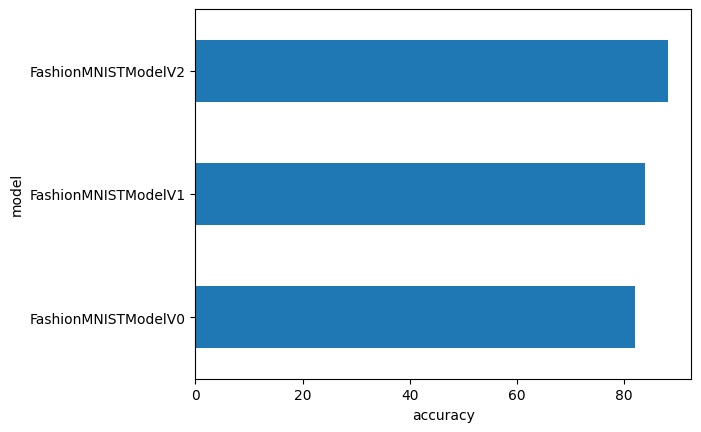

In [129]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy")
plt.ylabel("model")

## Make and evaluate random predictions with model

In [130]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # prepare sample (add batch dimension and send to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # forward pass
            pred_logit = model(sample)

            # get prediction probability
            pred_prob = torch.softmax(pred_logit, dim=1)

            # append pred prob to list
            pred_probs.append(pred_prob.cpu())

    return torch.vstack(pred_probs) # stack list of tensors into single tensor

In [131]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [132]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# view the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

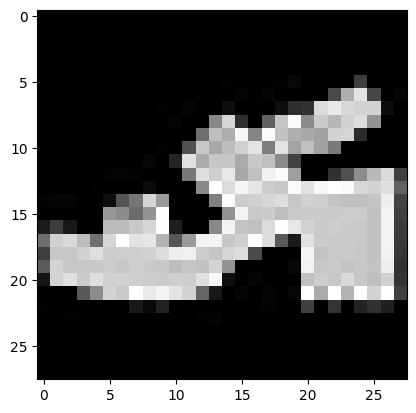

In [133]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")

In [134]:
# Make predictions on test samples
pred_probs = make_predictions(model=model_2,
                              data=test_samples,
                              device=device)

# view prediction probabilities
pred_probs[:2]

tensor([[1.3552e-06, 1.0504e-07, 1.6321e-06, 7.4819e-07, 1.2006e-07, 9.9914e-01,
         1.7982e-06, 1.5384e-04, 1.3445e-04, 5.7079e-04],
        [9.8090e-02, 3.6135e-01, 6.1429e-03, 3.6947e-01, 2.3259e-02, 2.6439e-04,
         1.3932e-01, 7.5100e-04, 1.1436e-03, 2.0569e-04]])

In [135]:
# convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 3, 7, 4, 3, 0, 4, 7, 1])

In [136]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

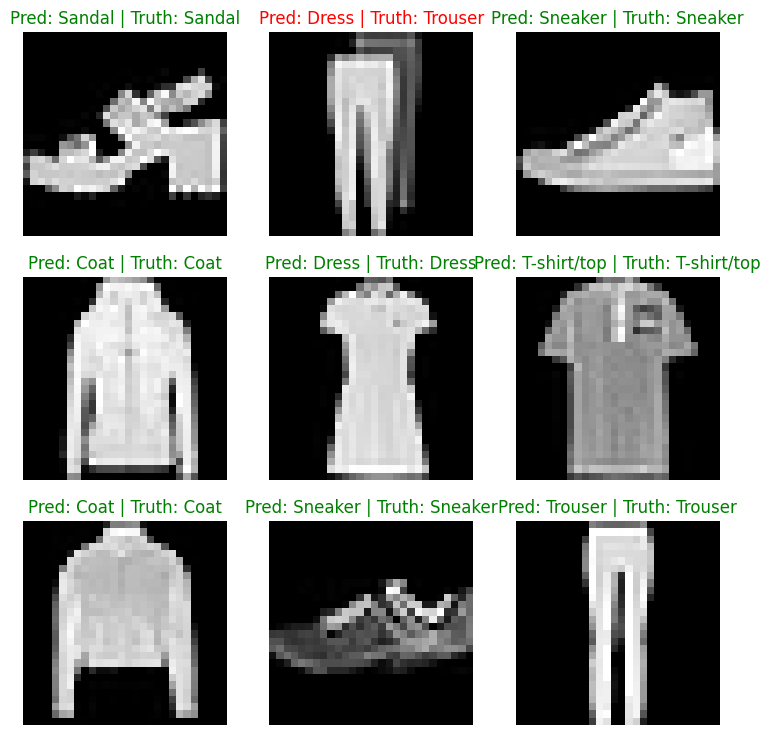

In [137]:
# plot predicitipons vs truth
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i in range(len(test_samples)):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(test_samples[i].squeeze(), cmap="gray")
    title_text = f"Pred: {class_names[pred_classes[i]]} | Truth: {class_names[test_labels[i]]}"
    if pred_classes[i] == test_labels[i]:
        plt.title(title_text, color="green")
    else:
        plt.title(title_text, color="red")
    plt.axis(False)

## Making confusion matrix

* 1. Make predictions with trained model on test data
* 2. Make confusion matrix
* 3. Plot that

In [138]:
from tqdm.auto import tqdm

# 1. Make prdecitions
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        # send data to target device
        X, y = X.to(device), y.to(device)

        # forward pass
        y_logit = model_2(X)

        # get prediction probabilities
        y_pred_prob = torch.softmax(y_logit, dim=1)

        # get pred labels
        y_pred = y_pred_prob.argmax(dim=1)

        # append pred labels to list
        y_preds.append(y_pred.cpu())

# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...: 100%|██████████| 313/313 [00:00<00:00, 381.62it/s]


tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [139]:
%pip install torchmetrics mlxtend


  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/a9/f9/f62b6c3bd08e1269d9bca9aabe0d990a7c3ffbfbcc495135ad0b59ce860b/mlxtend-0.24.0-py3-none-any.whl.metadata
  Using cached mlxtend-0.24.0-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.24.0-py3-none-any.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [140]:
import torchmetrics
import mlxtend


In [141]:
print(torchmetrics.__version__)
print(mlxtend.__version__)

1.8.2
0.24.0


In [143]:
# 2 make confusion matrix
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

confmat_tensor

tensor([[862,   0,   9,  37,   6,   1,  77,   0,   8,   0],
        [  0, 969,   1,  24,   3,   0,   1,   0,   2,   0],
        [ 13,   0, 753,   9, 133,   0,  90,   0,   2,   0],
        [ 19,   1,   8, 929,  13,   0,  28,   0,   2,   0],
        [  1,   2,  42,  56, 827,   0,  72,   0,   0,   0],
        [  0,   0,   0,   2,   0, 984,   0,  12,   1,   1],
        [162,   3,  70,  37,  79,   0, 631,   0,  18,   0],
        [  0,   0,   0,   0,   0,  29,   0, 943,   1,  27],
        [  2,   1,   4,   9,   2,   2,   5,   4, 971,   0],
        [  0,   0,   0,   0,   0,  12,   0,  40,   1, 947]])

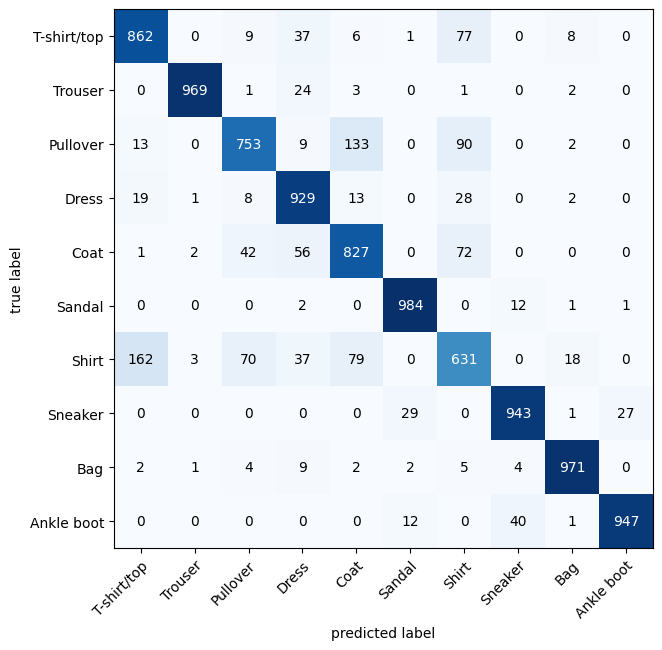

In [144]:
# 3. Plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize=(10, 7))

## 11. Save model

In [146]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = "fashion_mnist_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [149]:
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: models\fashion_mnist_model_2.pth
